In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [2]:
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default session for Keras

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:05:00.0, compute capability: 6.1



Using TensorFlow backend.


In [3]:
# fashion_mnist = keras.datasets.fashion_mnist
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# the data, split between train and test sets
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

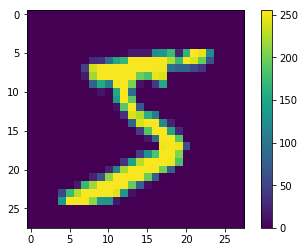

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

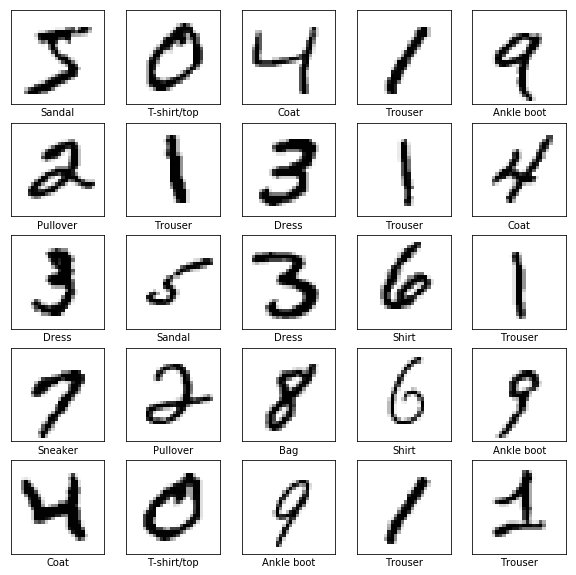

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(50, activation=tf.nn.sigmoid),
        keras.layers.Dense(50, activation=tf.nn.sigmoid),
        keras.layers.Dense(50, activation=tf.nn.sigmoid),
        keras.layers.Dense(50, activation=tf.nn.sigmoid),
        keras.layers.Dense(50, activation=tf.nn.sigmoid),
        keras.layers.Dense(50, activation=tf.nn.sigmoid),
        keras.layers.Dense(50, activation=tf.nn.sigmoid),
        keras.layers.Dense(50, activation=tf.nn.sigmoid),
        keras.layers.Dense(50, activation=tf.nn.sigmoid),
        keras.layers.Dense(50, activation=tf.nn.sigmoid),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

W0123 18:37:37.566198 140705158244160 deprecation.py:506] From /home/jiameng/packages/Bernsp/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, batch_size=128, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.6807 - acc: 0.7257
Epoch 2/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.6496 - acc: 0.7342
Epoch 3/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.6182 - acc: 0.7553
Epoch 4/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4737 - acc: 0.8630
Epoch 5/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3751 - acc: 0.9066
Epoch 6/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3402 - acc: 0.9169
Epoch 7/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3186 - acc: 0.9232
Epoch 8/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2966 - acc: 0.9291
Epoch 9/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2757 - acc: 0.9335
Epoch 10/20
60000/60000 [==============================] - 

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.2518 - acc: 0.9322
Test accuracy: 0.9322


## Make predictions

In [20]:
predictions = model.predict(test_images)

In [21]:
predictions[0]

array([6.7506596e-07, 2.4845863e-03, 2.5781943e-03, 1.8610911e-03,
       1.1272028e-03, 1.1257170e-04, 2.3870700e-05, 9.8783201e-01,
       1.3211870e-04, 3.8476468e-03], dtype=float32)

In [22]:
np.argmax(predictions[0])

7

In [23]:
test_labels[0]

7

In [24]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    predictions_array = predictions_array/ np.sum(predictions_array)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    predictions_array = predictions_array/ np.sum(predictions_array)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

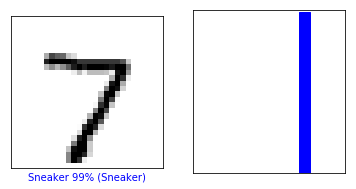

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

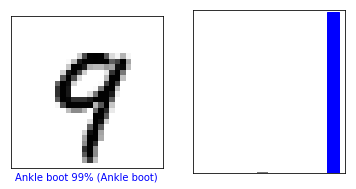

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

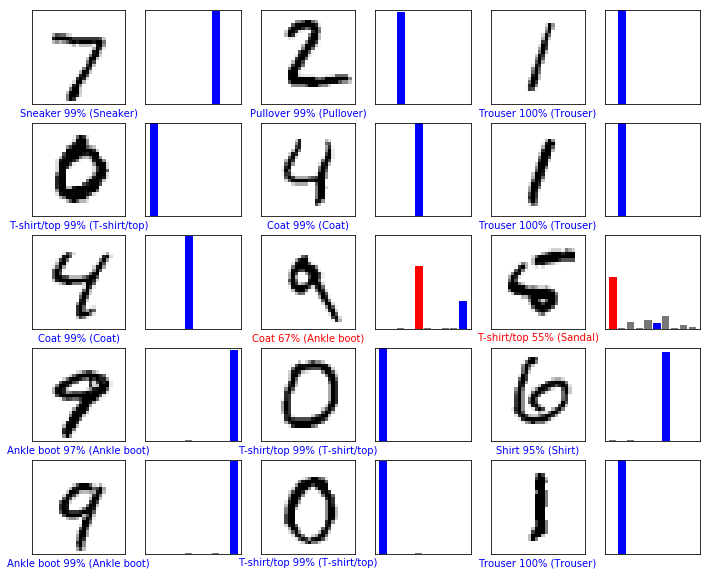

In [27]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [28]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = model.predict(img)

print(predictions_single)

[[6.7506596e-07 2.4845887e-03 2.5781957e-03 1.8610929e-03 1.1272038e-03
  1.1257170e-04 2.3870720e-05 9.8783201e-01 1.3211883e-04 3.8476468e-03]]


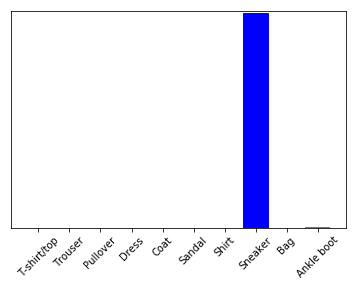

In [31]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [32]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

7


In [33]:
# serialize model to JSON
model_json = model.to_json()
with open("model/model_MNIST_FC10_50_sigmoid.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model/model_MNIST_FC10_50_sigmoid.h5")
print("Saved model to disk")

Saved model to disk


In [49]:
weights = []
for layer in model.layers:
    weights.append(layer.get_weights()) # list of numpy arrays